In [239]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import itertools
import warnings
import os
import cv2

In [240]:
from scipy import sparse
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [241]:
# path = 'D:\study-hk2\ML\ML\classification_fish\data\Fish_Dataset' 
path = "D:\\study\\machine_learning\\classification_fish\\clustering\\data\\Fish_Dataset_Segment" # đường dẫn đến thư mục chứa dữ liệu
classes = [i for i in os.listdir(path) if '.' not in i]                     
classes

['Black Sea Sprat',
 'Gilt Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [242]:
data = [] # mảng chứa dữ liệu
folders = os.listdir(path)
# print(folders)
for folder in folders:
    folder_path = os.path.join(path, folder)
    for i in range(1, 101):
        img_path = os.path.join(folder_path, f"{str(i).zfill(5)}.png")

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        data.append([img, folder])

In [243]:
# shuffle data_test
import random
random.seed(42)
random.shuffle(data)

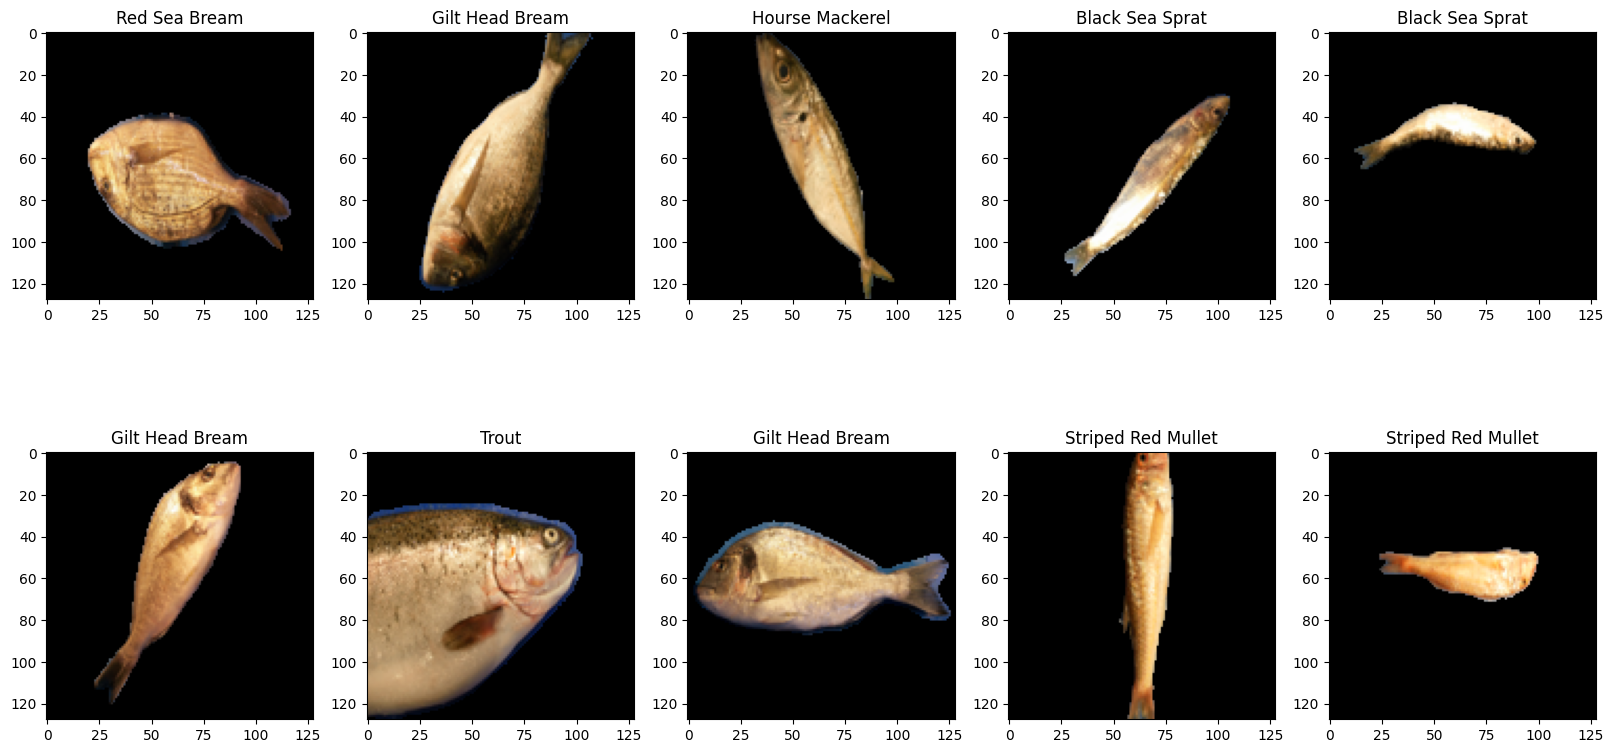

In [244]:
# hiện thị một vài ảnh và nhãn tương ứng
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    j = np.random.randint(0, 890)
    plt.imshow(data[j+i][0])
    plt.title(data[j+i][1])

In [245]:
# tạo image và label từ data
images = []
labels = []
for image, label in data:
    images.append(image)
    labels.append(label)

In [246]:
# chuấn hóa label thành dạng số
le = LabelEncoder()
labels = le.fit_transform(labels)

# in ra label và tên tương ứng
for i in range(9):
    print(i, le.classes_[i])

0 Black Sea Sprat
1 Gilt Head Bream
2 Hourse Mackerel
3 Red Mullet
4 Red Sea Bream
5 Sea Bass
6 Shrimp
7 Striped Red Mullet
8 Trout


In [247]:
# chuyển images thành numpy array và chuẩn hóa về khoảng [0, 1]
images = np.array(images)
images = images.astype('float32') / 255.0
images.shape

(900, 128, 128, 3)

In [248]:
--

SyntaxError: invalid syntax (3659366440.py, line 1)

In [ ]:
# duỗi ảnh thành vector
images = images.reshape(images.shape[0], -1) # 9000 ảnh, mỗi ảnh có 128x128x3 = 49,152 pixel

In [ ]:
images.shape

(900, 49152)

---

In [ ]:
from keras.models import Sequential, load_model

In [ ]:
model = load_model('D:\\study\\machine_learning\\classification_fish\\model\\model1.hdf5')

In [ ]:
features = model.predict(images)

ValueError: in user code:

    File "c:\Users\vannt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\vannt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\vannt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\vannt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "c:\Users\vannt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\vannt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_15" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(None, 49152)


In [ ]:
kmeans = KMeans(n_clusters=9)
clusters = kmeans.fit_predict(features)
kmeans.cluster_centers_.shape

c:\Users\vannt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(9, 9)

In [ ]:
# xác định vị trí các ảnh là tâm của các cluster
center_id = []
for i in range(9):
    center_id.append(np.where(clusters == i)[0][0])
center_id

[0, 8, 17, 31, 6, 53, 25, 67, 40]

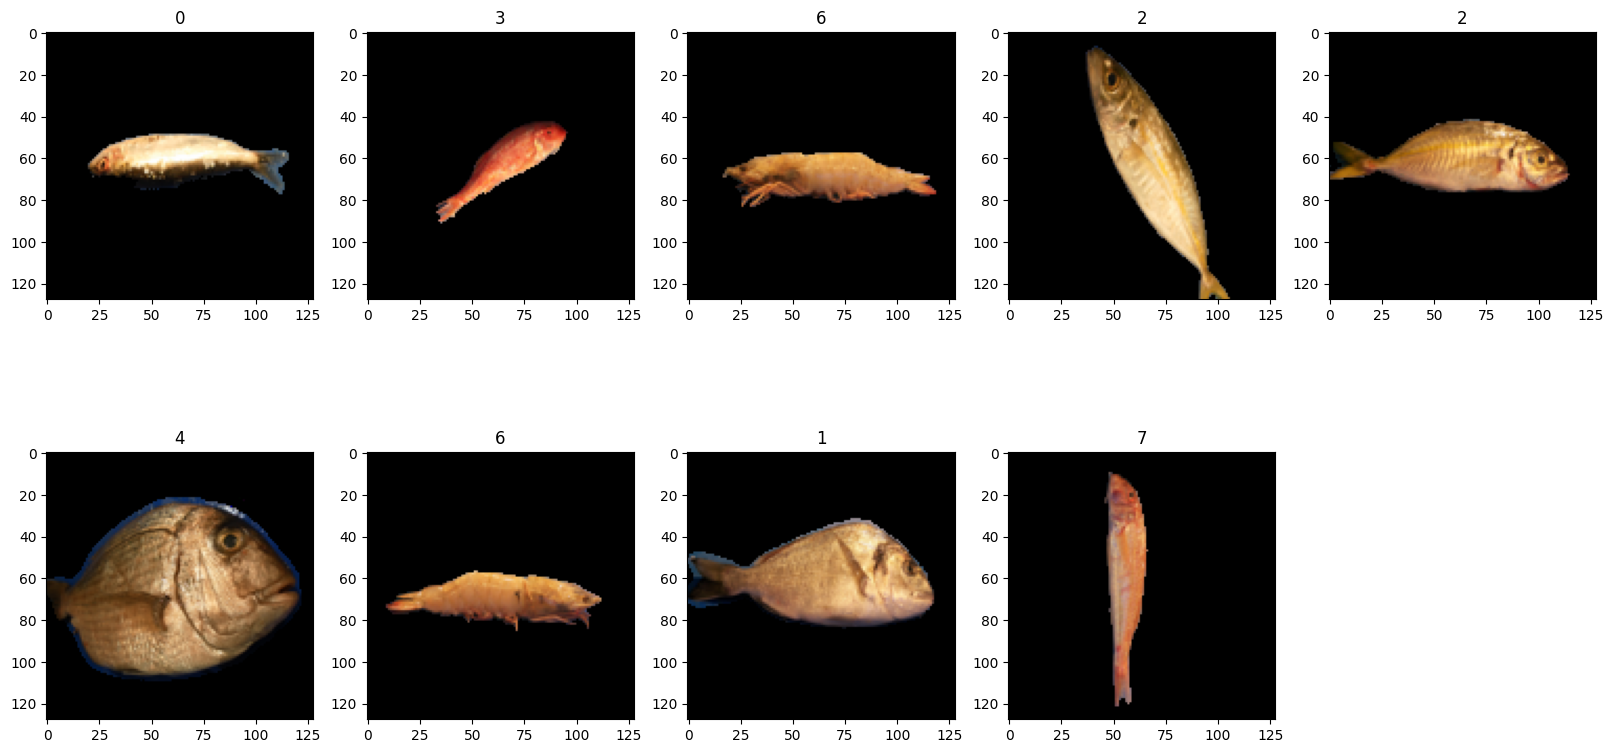

In [ ]:
# hiện thị các ảnh là tâm của các cluster
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[center_id[i]].reshape(128, 128, 3))
    # plt.title(i)
    plt.title(labels[center_id[i]])

C:\Users\vannt\AppData\Local\Temp\ipykernel_14692\1281575865.py:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, images_per_row, i+1)


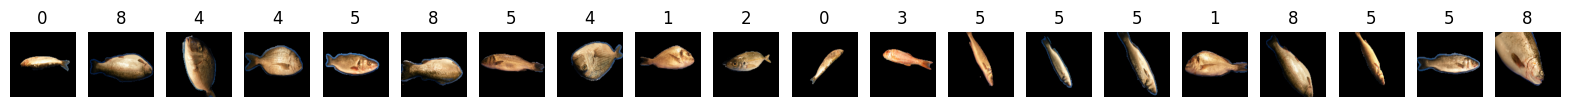

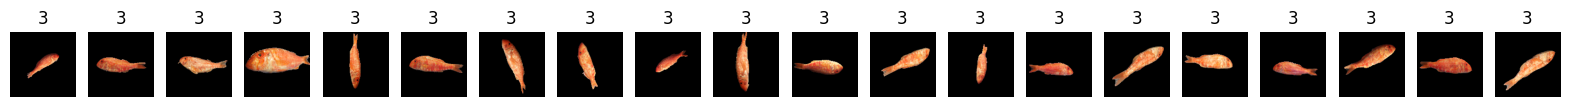

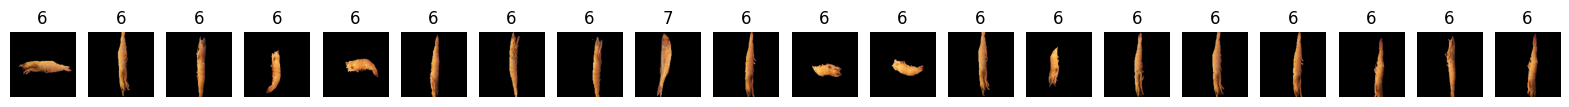

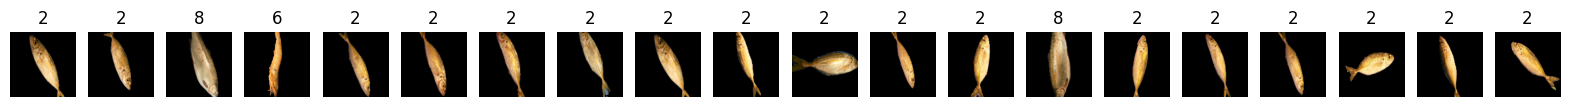

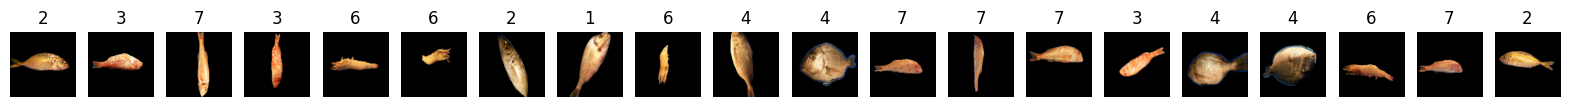

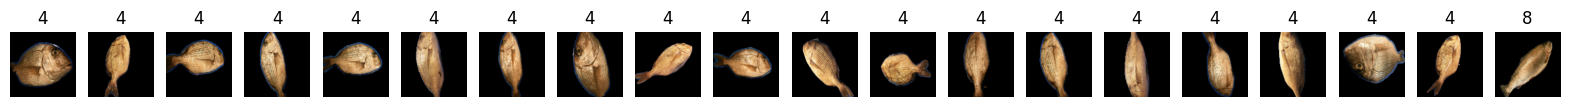

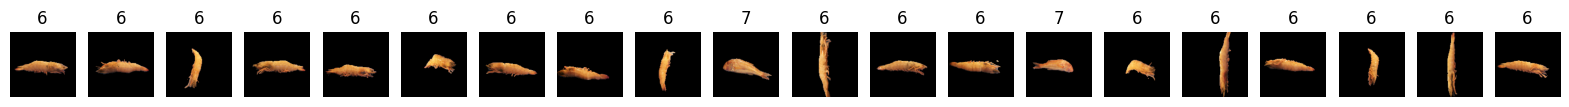

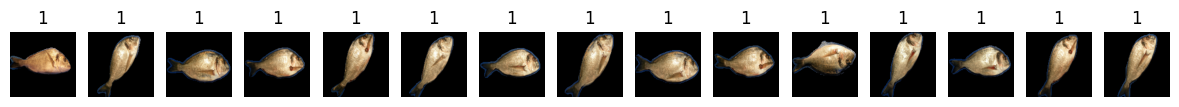

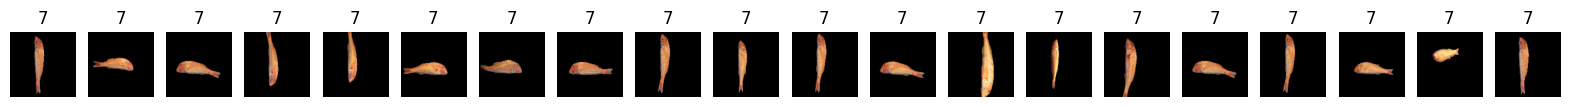

In [ ]:
import matplotlib.pyplot as plt

# Reshape cluster centers to match image dimensions
cluster_centers = np.array(kmeans.cluster_centers_)

num_clusters = cluster_centers.shape[0]
images_per_row = 20

# Display clusters
for cluster_id in range(num_clusters):
    cluster_center = cluster_centers[cluster_id]

    # Create a new row for each cluster
    plt.figure(figsize=(20, 1))

    # Plot the cluster center as the first image in the row
    plt.subplot(1, images_per_row + 1, 1)
    plt.imshow(images[cluster_id].reshape(128,128,3))
    plt.title(labels[cluster_id])
    plt.axis('off')

    # Get indices of images in the current cluster
    cluster_indices = np.where(clusters == cluster_id)[0]

    # Plot the images in the cluster
    for i, img_idx in enumerate(cluster_indices[:images_per_row]):
        img = images[img_idx]
        plt.subplot(1, images_per_row, i+1)
        plt.imshow(img.reshape(128,128,3))
        plt.title(labels[img_idx])
        plt.axis('off')

    plt.show()

In [ ]:
--

SyntaxError: invalid syntax (3659366440.py, line 1)

---

In [ ]:
import tensorflow as tf

# Xây dựng mô hình Encoder
input_dim = images.shape[1]
encoding_dim = 128
latent_dim = 2

input_data = tf.keras.Input(shape=(input_dim,))
hidden = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_data)
z_mean = tf.keras.layers.Dense(latent_dim)(hidden)
z_log_var = tf.keras.layers.Dense(latent_dim)(hidden)

# Sampling từ phân phối Gaussian
epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
z = z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

# Xây dựng mô hình Decoder
decoder_hidden = tf.keras.layers.Dense(encoding_dim, activation='relu')
decoder_output = tf.keras.layers.Dense(input_dim, activation='sigmoid')
hidden_decoded = decoder_hidden(z)
output_data = decoder_output(hidden_decoded)

# Xây dựng mô hình VAE
vae = tf.keras.Model(input_data, output_data)

# Tính toán loss function
reconstruction_loss = tf.keras.losses.binary_crossentropy(input_data, output_data)
kl_loss = -0.5 * tf.keras.backend.mean(1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var))
vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)

# Biên dịch và huấn luyện mô hình
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.fit(images, epochs=10, batch_size=256)

Epoch 1/10
4/4 [==============================] - 3s 406ms/step - loss: 1062.5212
Epoch 2/10
4/4 [==============================] - 2s 529ms/step - loss: 569.8845
Epoch 3/10
4/4 [==============================] - 2s 481ms/step - loss: 864.2225
Epoch 4/10
4/4 [==============================] - 2s 381ms/step - loss: 978.3561
Epoch 5/10
4/4 [==============================] - 2s 385ms/step - loss: 946.4822
Epoch 6/10
4/4 [==============================] - 2s 371ms/step - loss: 877.5377
Epoch 7/10
4/4 [==============================] - 2s 368ms/step - loss: 747.1309
Epoch 8/10
4/4 [==============================] - 2s 372ms/step - loss: 625.3068
Epoch 9/10
4/4 [==============================] - 2s 384ms/step - loss: 482.1604
Epoch 10/10
4/4 [==============================] - 2s 371ms/step - loss: 366.7601


In [ ]:
import tensorflow as tf

# Set parameters
input_dim = images.shape[1]
encoding_dim = 128
latent_dim = 2
learning_rate = 0.001
batch_size = 256
epochs = 10

# Build the Encoder model
input_data = tf.keras.Input(shape=(input_dim,))
hidden = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_data)
z_mean = tf.keras.layers.Dense(latent_dim)(hidden)
z_log_var = tf.keras.layers.Dense(latent_dim)(hidden)

# Sampling from the Gaussian distribution
epsilon = tf.keras.backend.random_normal(shape=(tf.keras.backend.shape(z_mean)[0], latent_dim), mean=0., stddev=1.)
z = z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

# Build the Decoder model
decoder_hidden = tf.keras.layers.Dense(encoding_dim, activation='relu')
decoder_output = tf.keras.layers.Dense(input_dim, activation='sigmoid')
hidden_decoded = decoder_hidden(z)
output_data = decoder_output(hidden_decoded)

# Build the VAE model
vae = tf.keras.Model(input_data, output_data)

# Compute the loss function
reconstruction_loss = tf.keras.losses.binary_crossentropy(input_data, output_data)
kl_loss = -0.5 * tf.keras.backend.mean(1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var))
vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)

# Compile and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
vae.add_loss(vae_loss)
vae.compile(optimizer=optimizer)
vae.fit(images, epochs=epochs, batch_size=batch_size)

Epoch 1/10
4/4 [==============================] - 3s 391ms/step - loss: 2199156948992.0000
Epoch 2/10
4/4 [==============================] - 2s 375ms/step - loss: 155.5440
Epoch 3/10
4/4 [==============================] - 2s 372ms/step - loss: 247.3547
Epoch 4/10
4/4 [==============================] - 2s 377ms/step - loss: 266.2769
Epoch 5/10
4/4 [==============================] - 2s 376ms/step - loss: 205.5471
Epoch 6/10
4/4 [==============================] - 2s 388ms/step - loss: 118.2265
Epoch 7/10
4/4 [==============================] - 2s 381ms/step - loss: 54.2899
Epoch 8/10
4/4 [==============================] - 2s 380ms/step - loss: 22.3976
Epoch 9/10
4/4 [==============================] - 2s 373ms/step - loss: 11.4884
Epoch 10/10
4/4 [==============================] - 2s 371ms/step - loss: 12.0061


In [ ]:

# Sử dụng mô hình đã huấn luyện để giải mã dữ liệu
decoded_data = vae.predict(images)

29/29 [==============================] - 0s 10ms/step


In [ ]:
kmeans = KMeans(n_clusters=9)
clusters = kmeans.fit_predict(decoded_data)
kmeans.cluster_centers_.shape

c:\Users\vannt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(9, 49152)

In [ ]:
# xác định vị trí các ảnh là tâm của các cluster
center_id = []
for i in range(9):
    center_id.append(np.where(clusters == i)[0][0])
center_id

[10, 8, 9, 12, 24, 1, 3, 2, 0]

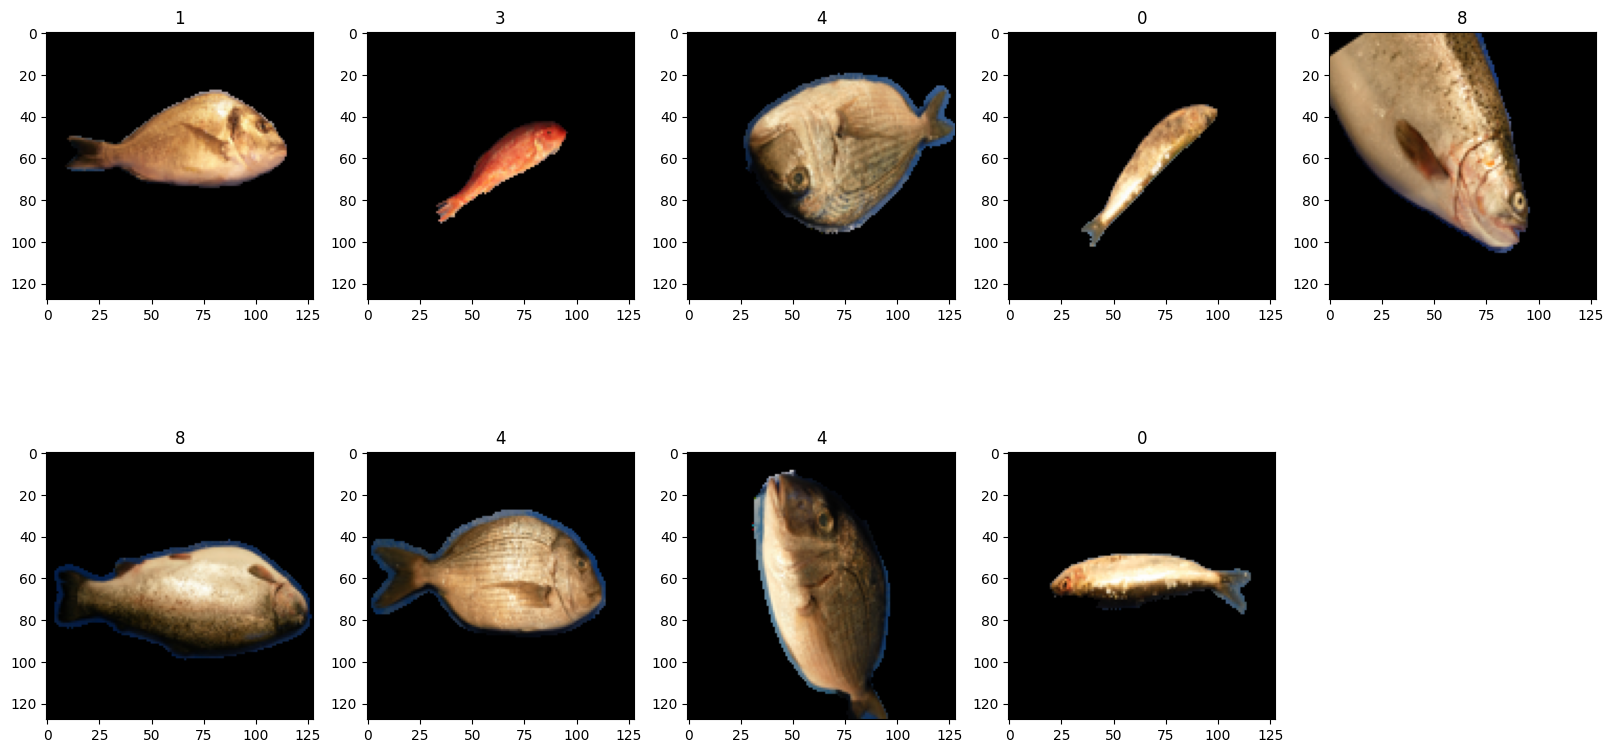

In [ ]:
# hiện thị các ảnh là tâm của các cluster
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[center_id[i]].reshape(128, 128, 3))
    # plt.title(i)
    plt.title(labels[center_id[i]])

C:\Users\vannt\AppData\Local\Temp\ipykernel_14692\4247533626.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, images_per_row, i+1)


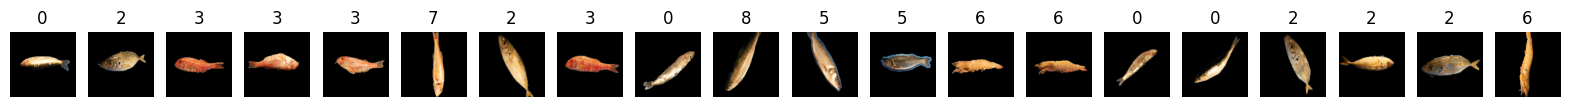

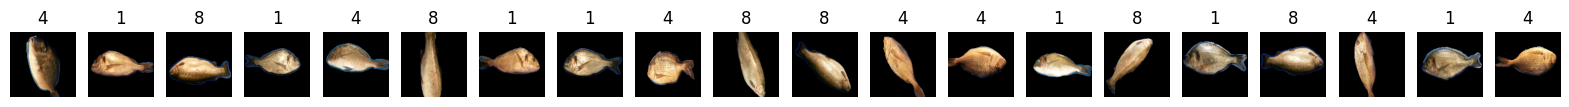

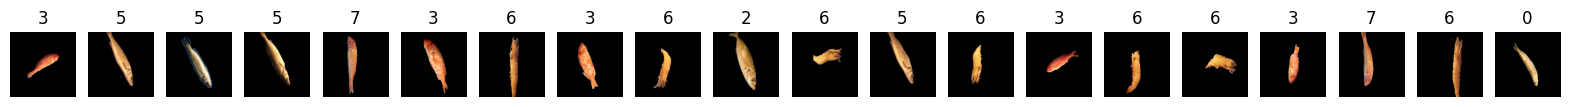

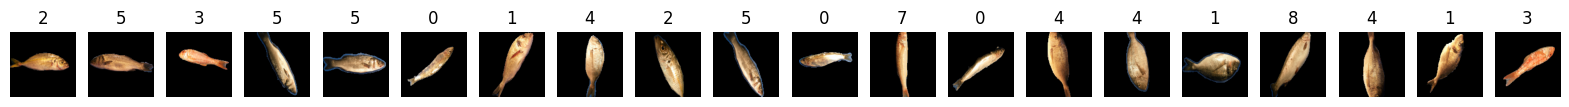

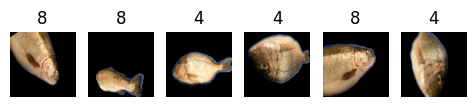

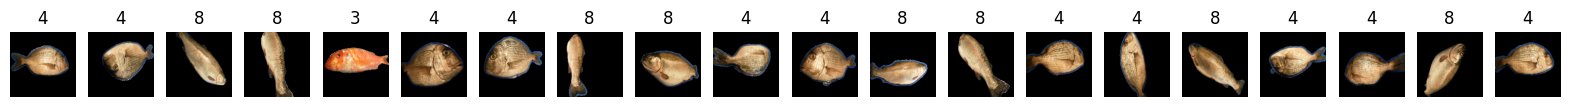

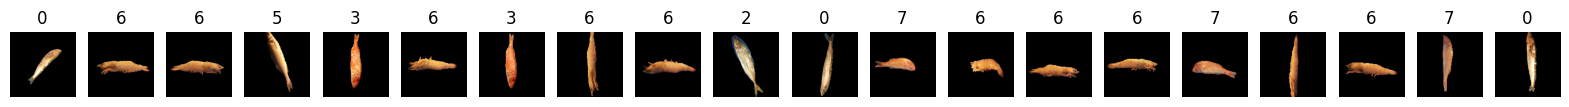

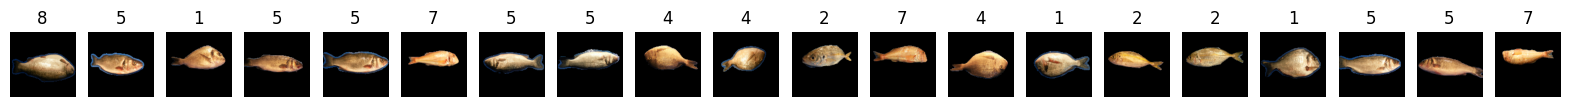

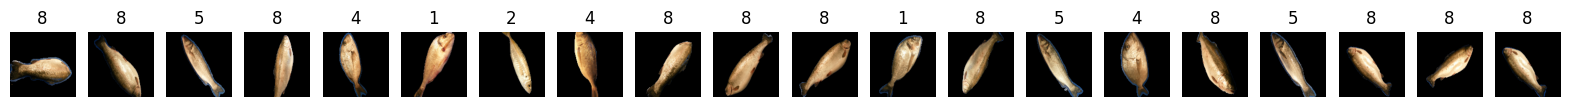

In [ ]:
import matplotlib.pyplot as plt

# Reshape cluster centers to match image dimensions
cluster_centers = np.array(kmeans.cluster_centers_)

num_clusters = cluster_centers.shape[0]
images_per_row = 20

# Display clusters
for cluster_id in range(num_clusters):
    cluster_center = cluster_centers[cluster_id]

    # Create a new row for each cluster
    plt.figure(figsize=(20, 1))

    # Plot the cluster center as the first image in the row
    plt.subplot(1, images_per_row + 1, 1)
    plt.imshow(cluster_center.astype(np.uint8).reshape(128,128,3))
    plt.axis('off')

    # Get indices of images in the current cluster
    cluster_indices = np.where(clusters == cluster_id)[0]

    # Plot the images in the cluster
    for i, img_idx in enumerate(cluster_indices[:images_per_row]):
        img = images[img_idx]
        plt.subplot(1, images_per_row, i+1)
        plt.imshow(img.reshape(128,128,3))
        plt.title(labels[img_idx])
        plt.axis('off')

    plt.show()

In [ ]:
--

SyntaxError: invalid syntax (3659366440.py, line 1)

---

### Xây dựng thuật toán

c:\Users\vannt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\vannt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\vannt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\vannt\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

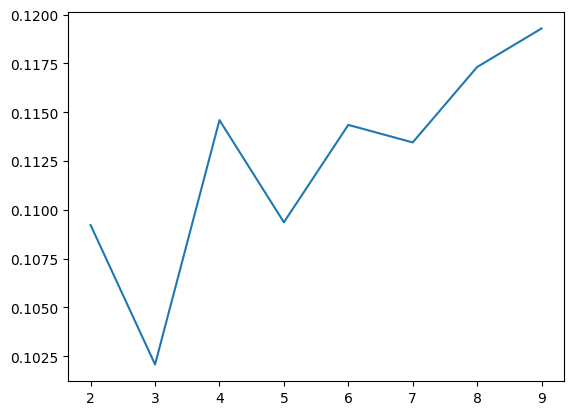

In [ ]:
# sử dụng Elbow method để tìm số lượng cluster phù hợp
scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(images)
    scores.append(silhouette_score(images, kmeans.labels_))

plt.plot(range(2, 10), scores)

In [ ]:
kmeans = KMeans(n_clusters=9, random_state=42, n_init=10)
clusters = kmeans.fit_predict(images)
kmeans.cluster_centers_.shape

(9, 49152)

In [ ]:
# xác định vị trí các ảnh là tâm của các cluster
center_id = []
for i in range(9):
    center_id.append(np.where(clusters == i)[0][0])
center_id

[4, 10, 13, 2, 5, 21, 0, 9, 1]

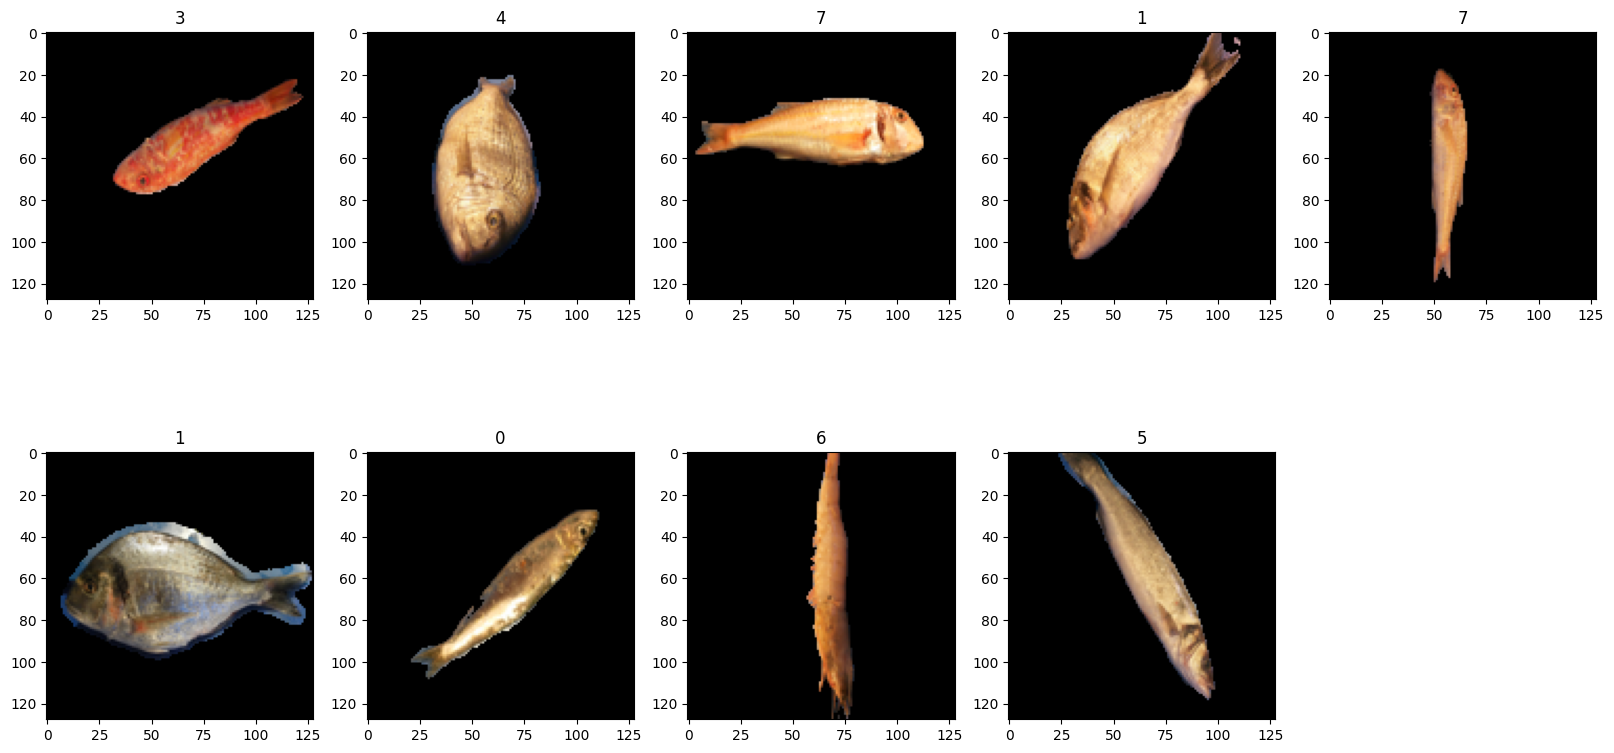

In [ ]:
# hiện thị các ảnh là tâm của các cluster
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[center_id[i]].reshape(128, 128, 3))
    # plt.title(i)
    plt.title(labels[center_id[i]])

C:\Users\vannt\AppData\Local\Temp\ipykernel_7696\1513516239.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, images_per_row, i+1)


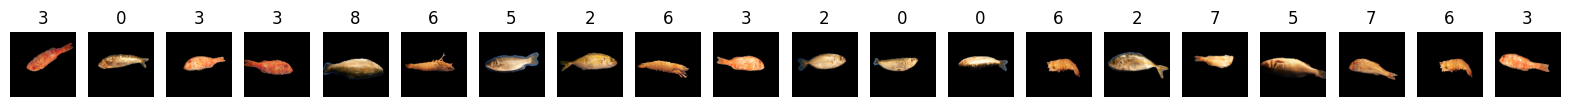

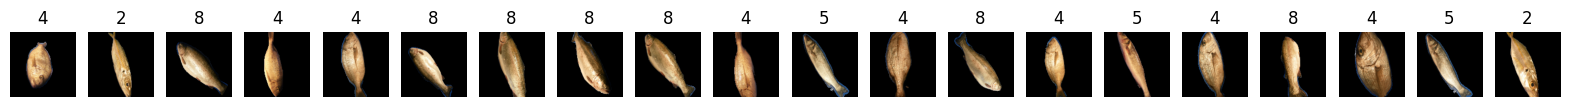

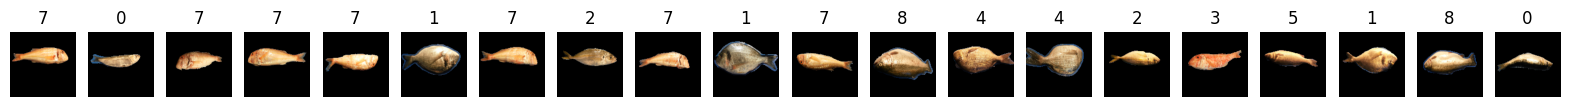

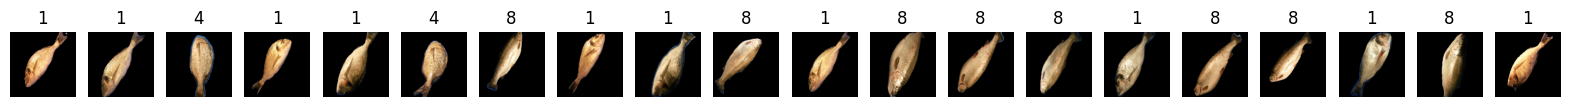

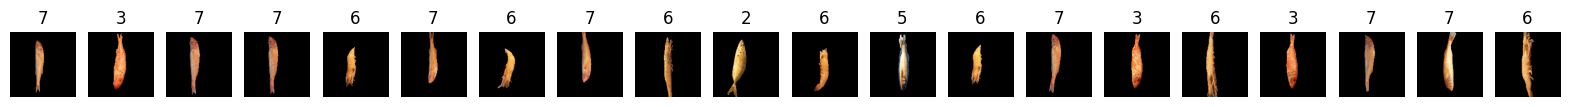

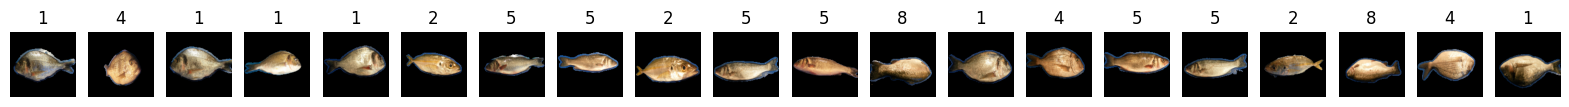

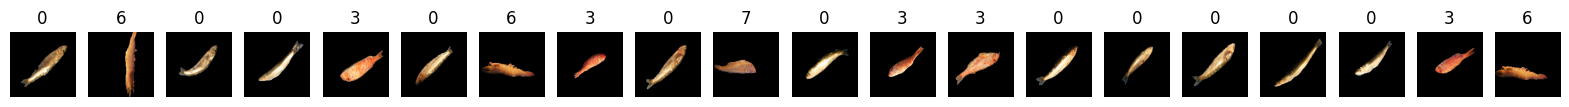

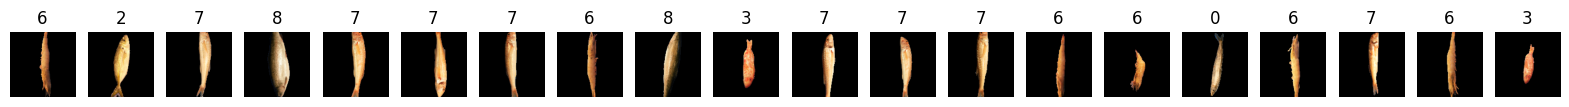

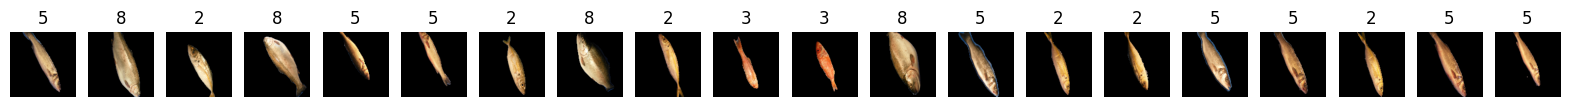

In [ ]:
import matplotlib.pyplot as plt

# Reshape cluster centers to match image dimensions
cluster_centers = np.array(kmeans.cluster_centers_)

num_clusters = cluster_centers.shape[0]
images_per_row = 20

# Display clusters
for cluster_id in range(num_clusters):
    cluster_center = cluster_centers[cluster_id]

    # Create a new row for each cluster
    plt.figure(figsize=(20, 1))

    # Plot the cluster center as the first image in the row
    plt.subplot(1, images_per_row + 1, 1)
    plt.imshow(cluster_center.astype(np.uint8).reshape(128,128,3))
    plt.axis('off')

    # Get indices of images in the current cluster
    cluster_indices = np.where(clusters == cluster_id)[0]

    # Plot the images in the cluster
    for i, img_idx in enumerate(cluster_indices[:images_per_row]):
        img = images[img_idx]
        plt.subplot(1, images_per_row, i+1)
        plt.imshow(img.reshape(128,128,3))
        plt.title(labels[img_idx])
        plt.axis('off')

    plt.show()


---

### Sử dụng Transfer - learning

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.callbacks import ModelCheckpoint

from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Activation

In [ ]:
# tạo model
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(256, (5,5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# tạo image và label từ data
images = []
labels = []
for image, label in data:
    images.append(image)
    labels.append(label)

In [ ]:
# chuấn hóa label thành dạng số
le = LabelEncoder()
labels = le.fit_transform(labels)

# in ra label và tên tương ứng
for i in range(9):
    print(i, le.classes_[i])

0 Black Sea Sprat
1 Gilt Head Bream
2 Hourse Mackerel
3 Red Mullet
4 Red Sea Bream
5 Sea Bass
6 Shrimp
7 Striped Red Mullet
8 Trout


In [ ]:
# chuyển images thành numpy array và chuẩn hóa về khoảng [0, 1]
images = np.array(images)
images = images.astype('float32') / 255.0
images.shape

(900, 128, 128, 3)

In [ ]:
features = model.predict(images)

29/29 [==============================] - 6s 215ms/step


In [ ]:
# in ra mỗi bức ảnh sau khi được trích xuất đặc trưng có kích thước là bao nhiêu
features.shape

(900, 4096)

In [ ]:
import warnings

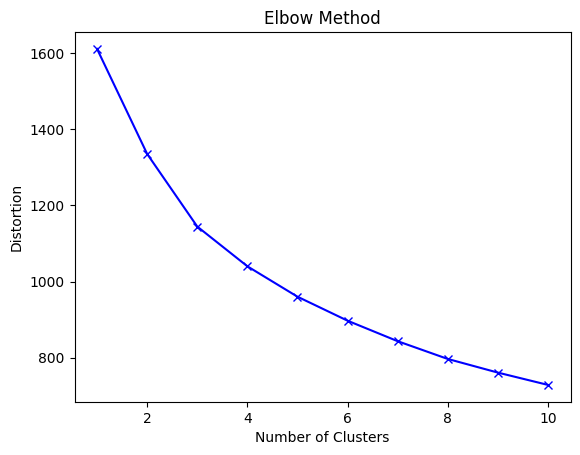

In [ ]:
warnings.filterwarnings("ignore")

# Khởi tạo một mảng lưu distortion cho mỗi số lượng cụm
distortions = []

# Thử các số lượng cụm từ 1 đến k_max
k_max = 10
for k in range(1, k_max+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    distortions.append(kmeans.inertia_)

# Vẽ đồ thị elbow
plt.plot(range(1, k_max+1), distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

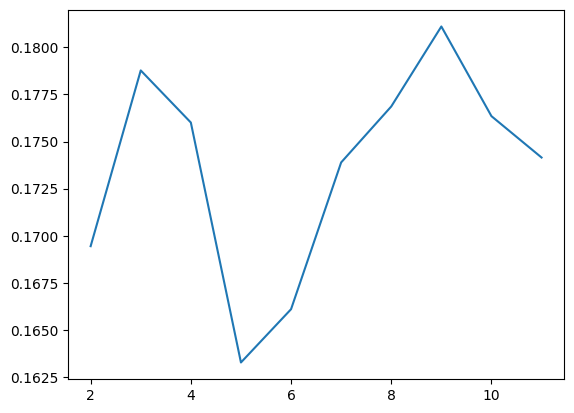

In [ ]:
warnings.filterwarnings("ignore")

scores = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    scores.append(silhouette_score(features, kmeans.labels_))

plt.plot(range(2, 12), scores)

In [ ]:
# sư dụng KMeans để phân cụm các vector đặc trưng
kmeans = KMeans(n_clusters=9)
clusters = kmeans.fit_predict(features)

In [ ]:
# xác định vị trí các ảnh là tâm của các cluster
center_id = []
for i in range(9):
    center_id.append(np.where(clusters == i)[0][0])
center_id

[2, 29, 0, 10, 3, 8, 14, 17, 37]

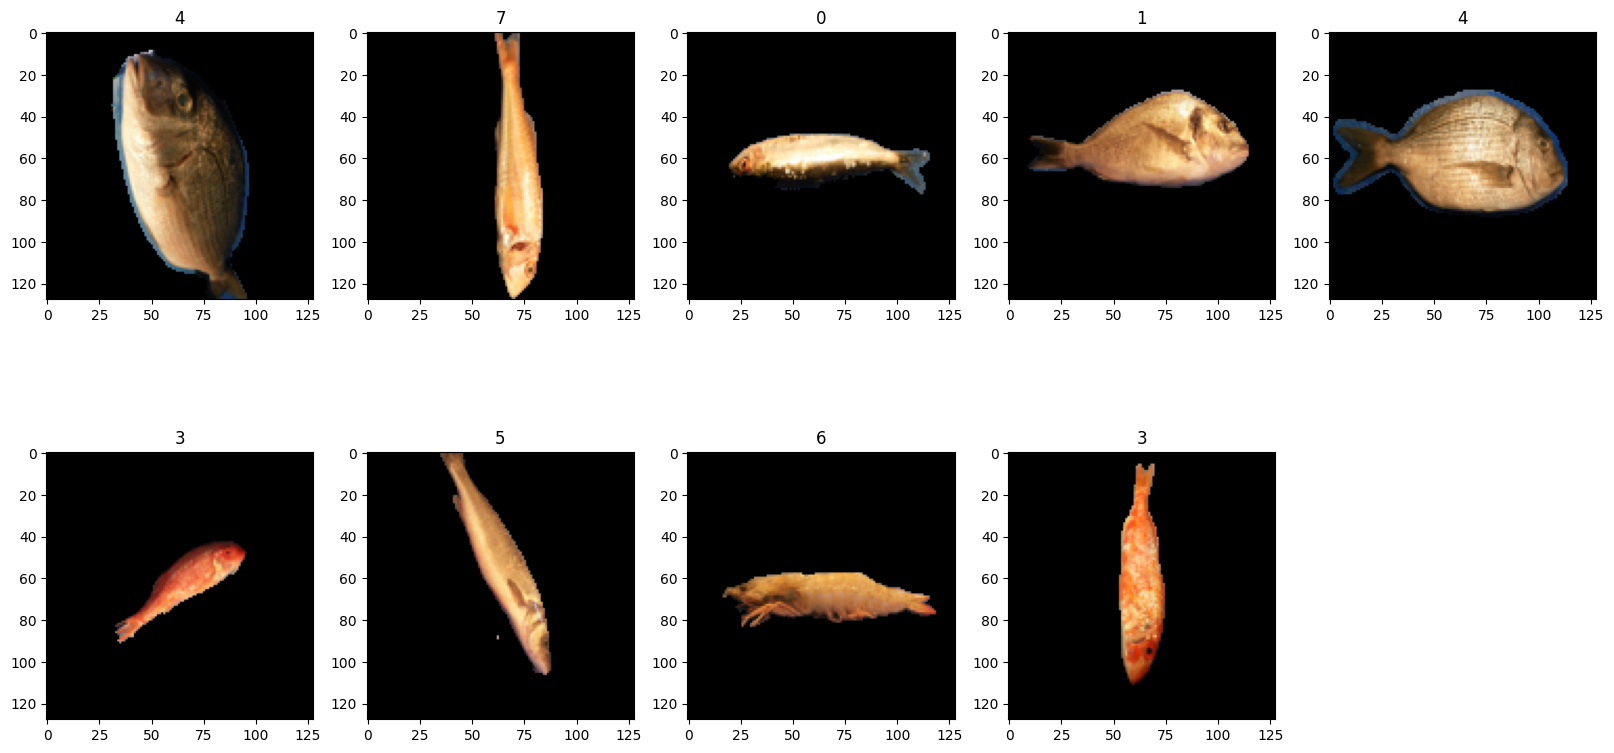

In [ ]:
# in ra các ảnh là tâm của các cluster
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[center_id[i]].reshape(128, 128, 3))
    # plt.title(i)
    plt.title(labels[center_id[i]])

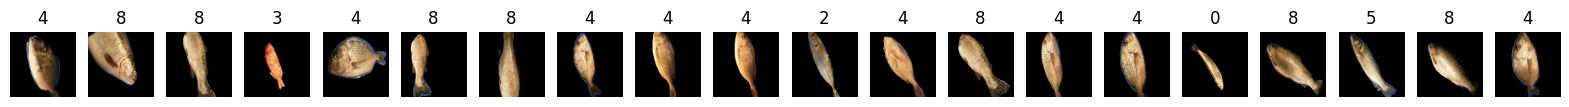

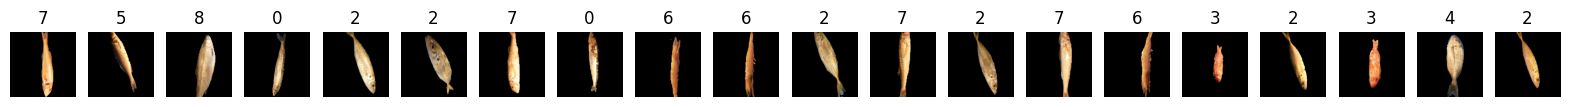

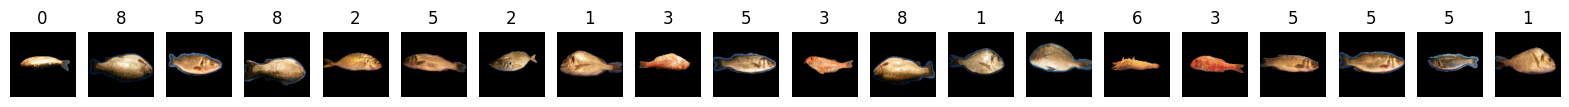

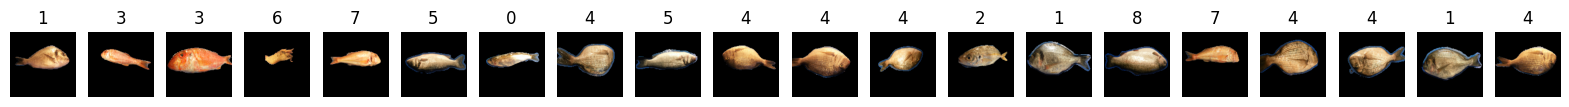

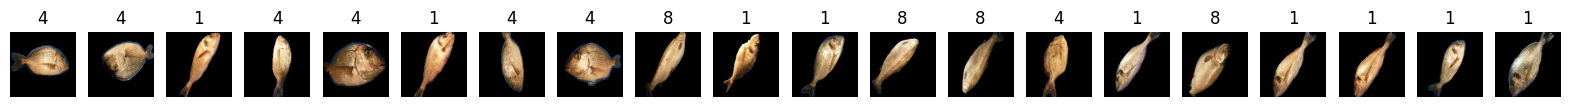

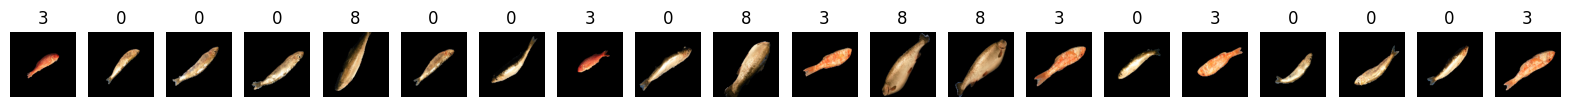

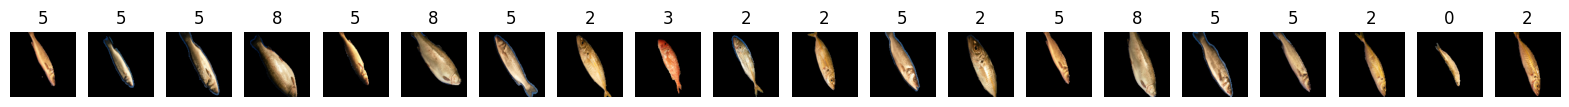

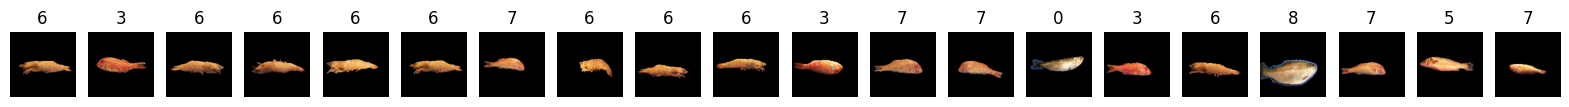

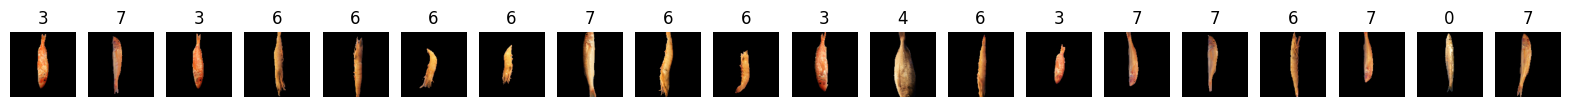

In [ ]:
import matplotlib.pyplot as plt

# Reshape cluster centers to match image dimensions
cluster_centers = np.array(kmeans.cluster_centers_)

num_clusters = cluster_centers.shape[0]
images_per_row = 20

# Display clusters
for cluster_id in range(num_clusters):
    cluster_center = cluster_centers[cluster_id]

    # Create a new row for each cluster
    plt.figure(figsize=(20, 1))

    # Plot the cluster center as the first image in the row
    plt.subplot(1, images_per_row + 1, 1)
    plt.imshow(images[cluster_indices[0]].reshape(128,128,3))
    plt.title(labels[cluster_indices[0]])
    plt.axis('off')

    # Get indices of images in the current cluster
    cluster_indices = np.where(clusters == cluster_id)[0]

    # Plot the images in the cluster
    for i, img_idx in enumerate(cluster_indices[:images_per_row]):
        img = images[img_idx]
        plt.subplot(1, images_per_row, i+1)
        plt.imshow(img.reshape(128,128,3))
        plt.title(labels[img_idx])
        plt.axis('off')

    plt.show()

---

### Mạng InceptionV3

In [ ]:

from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.applications import DenseNet121

In [ ]:
# Load pre-trained DenseNet121 model
pre_trained = DenseNet121(weights='imagenet', include_top=False, pooling='avg')

29084464/29084464 [==============================] - 3s 0us/step


In [ ]:
# Extract features from the images
features = pre_trained.predict(images)

29/29 [==============================] - 28s 929ms/step


In [ ]:
# Áp dụng K-means để phân cụm
kmeans = KMeans(n_clusters=9)
clusters = kmeans.fit_predict(features)

In [ ]:
# xác định vị trí các ảnh là tâm của các cluster
center_id = []
for i in range(9):
    center_id.append(np.where(clusters == i)[0][0])
center_id

[12, 14, 1, 8, 2, 15, 3, 13, 0]

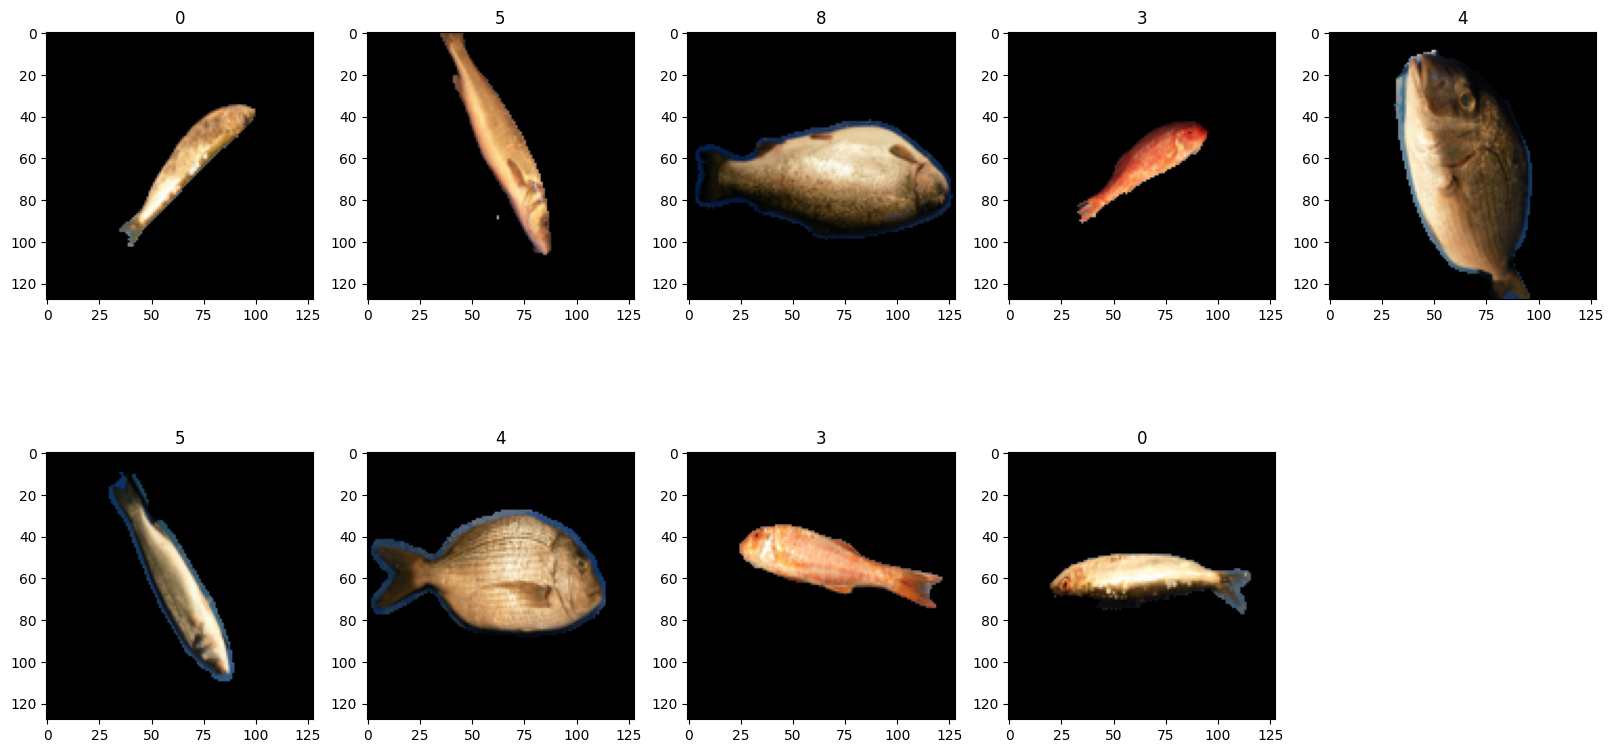

In [ ]:
# in ra các ảnh là tâm của các cluster
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[center_id[i]].reshape(128, 128, 3))
    # plt.title(i)
    plt.title(labels[center_id[i]])

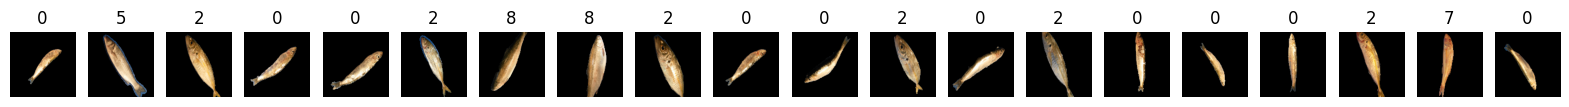

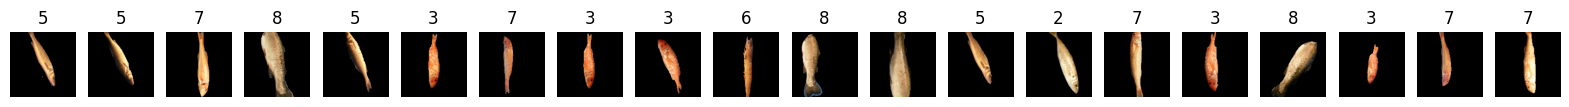

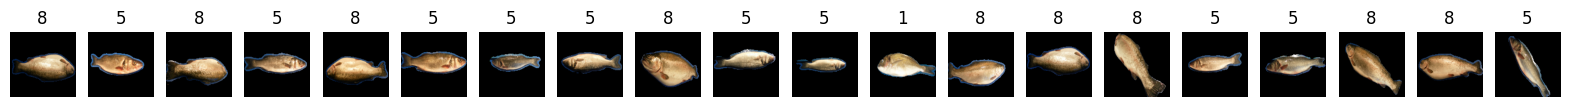

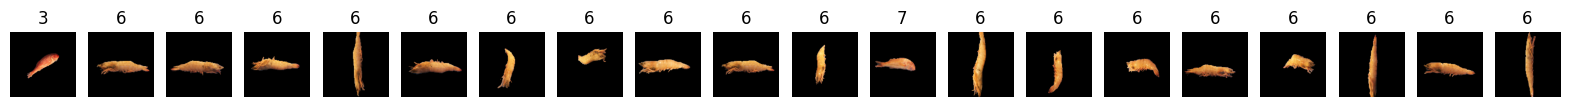

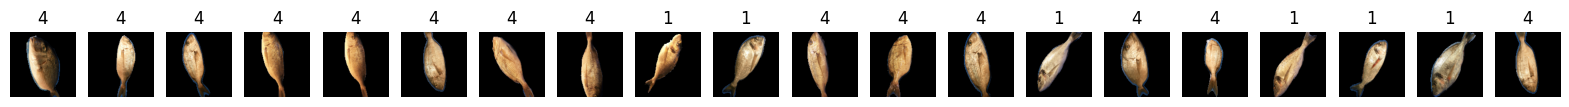

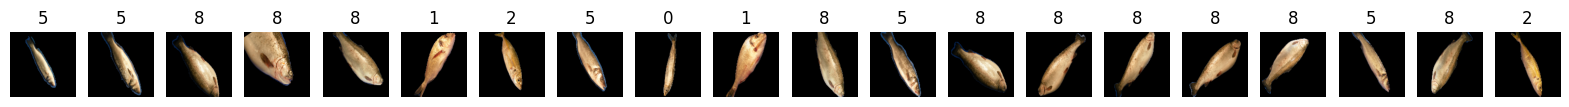

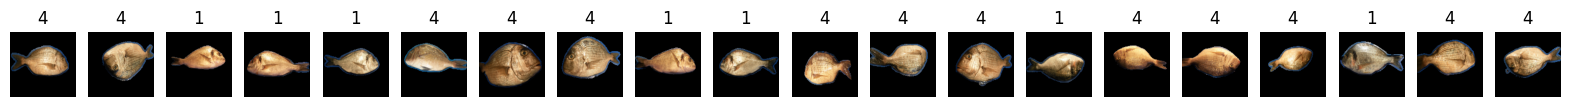

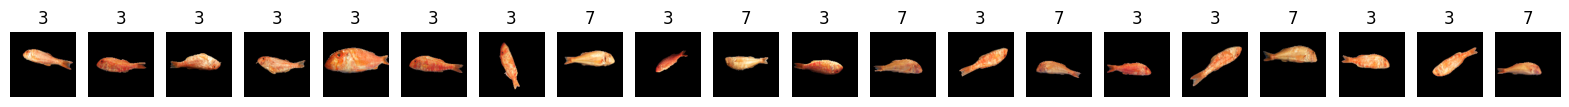

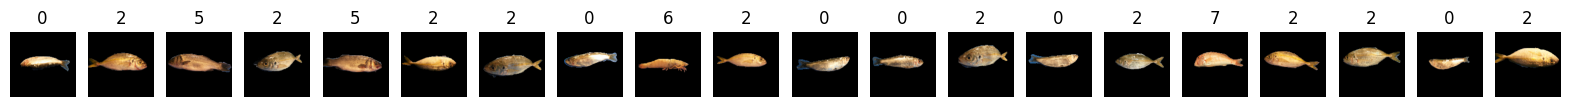

In [ ]:
import matplotlib.pyplot as plt

# Reshape cluster centers to match image dimensions
cluster_centers = np.array(kmeans.cluster_centers_)

num_clusters = cluster_centers.shape[0]
images_per_row = 20

# Display clusters
for cluster_id in range(num_clusters):
    cluster_center = cluster_centers[cluster_id]

    # Create a new row for each cluster
    plt.figure(figsize=(20, 1))

    # Plot the cluster center as the first image in the row
    plt.subplot(1, images_per_row + 1, 1)
    plt.imshow(images[cluster_indices[0]].reshape(128,128,3))
    plt.title(labels[cluster_indices[0]])
    plt.axis('off')

    # Get indices of images in the current cluster
    cluster_indices = np.where(clusters == cluster_id)[0]

    # Plot the images in the cluster
    for i, img_idx in enumerate(cluster_indices[:images_per_row]):
        img = images[img_idx]
        plt.subplot(1, images_per_row, i+1)
        plt.imshow(img.reshape(128,128,3))
        plt.title(labels[img_idx])
        plt.axis('off')

    plt.show()

In [ ]:
--

SyntaxError: invalid syntax (3659366440.py, line 1)

---

### MobileNetV2

In [289]:
from tensorflow.keras.applications import MobileNetV2

In [290]:
pre_trained= MobileNetV2(include_top=False, pooling='avg', input_shape=(128, 128, 3))

In [291]:
# Lấy đặc trưng từ pre-trained model
features = pre_trained.predict(images)

29/29 [==============================] - 7s 226ms/step


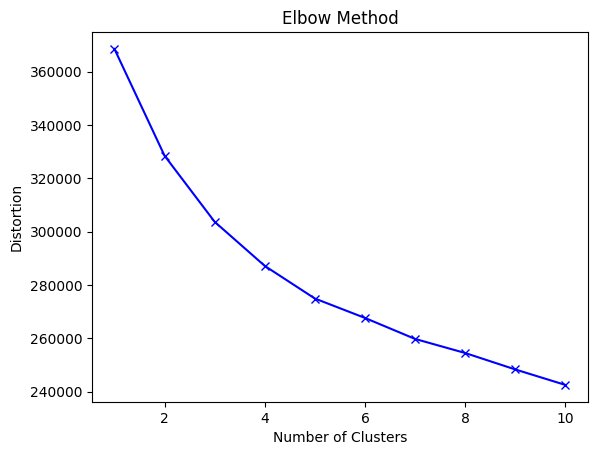

In [292]:
warnings.filterwarnings("ignore")

# Khởi tạo một mảng lưu distortion cho mỗi số lượng cụm
distortions = []

# Thử các số lượng cụm từ 1 đến k_max
k_max = 10
for k in range(1, k_max+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    distortions.append(kmeans.inertia_)

# Vẽ đồ thị elbow
plt.plot(range(1, k_max+1), distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

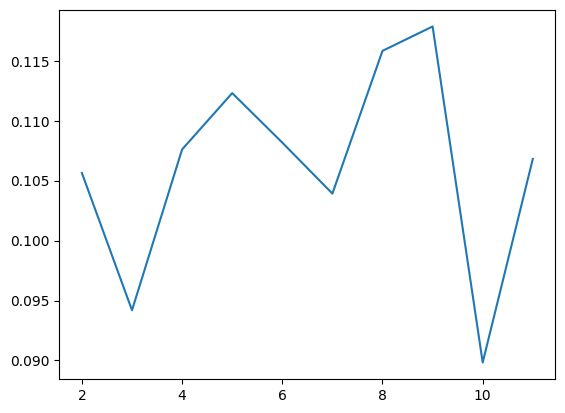

In [293]:
warnings.filterwarnings("ignore")

scores = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    scores.append(silhouette_score(features, kmeans.labels_))

plt.plot(range(2, 12), scores)

In [308]:
# Áp dụng K-means để phân cụm
kmeans =  KMeans ( n_clusters = 9 , init = 'k-means++' , n_init = 'warn' , max_iter = 300 , tol = 0.0001 , verbose = 0 , random_state = None , copy_x = True , algorithm = 'elkan' )
clusters = kmeans.fit_predict(features)

In [309]:
# xác định vị trí các ảnh là tâm của các cluster
center_id = []
for i in range(9):
    center_id.append(np.where(clusters == i)[0][0])
center_id

[12, 0, 8, 29, 2, 1, 44, 17, 31]

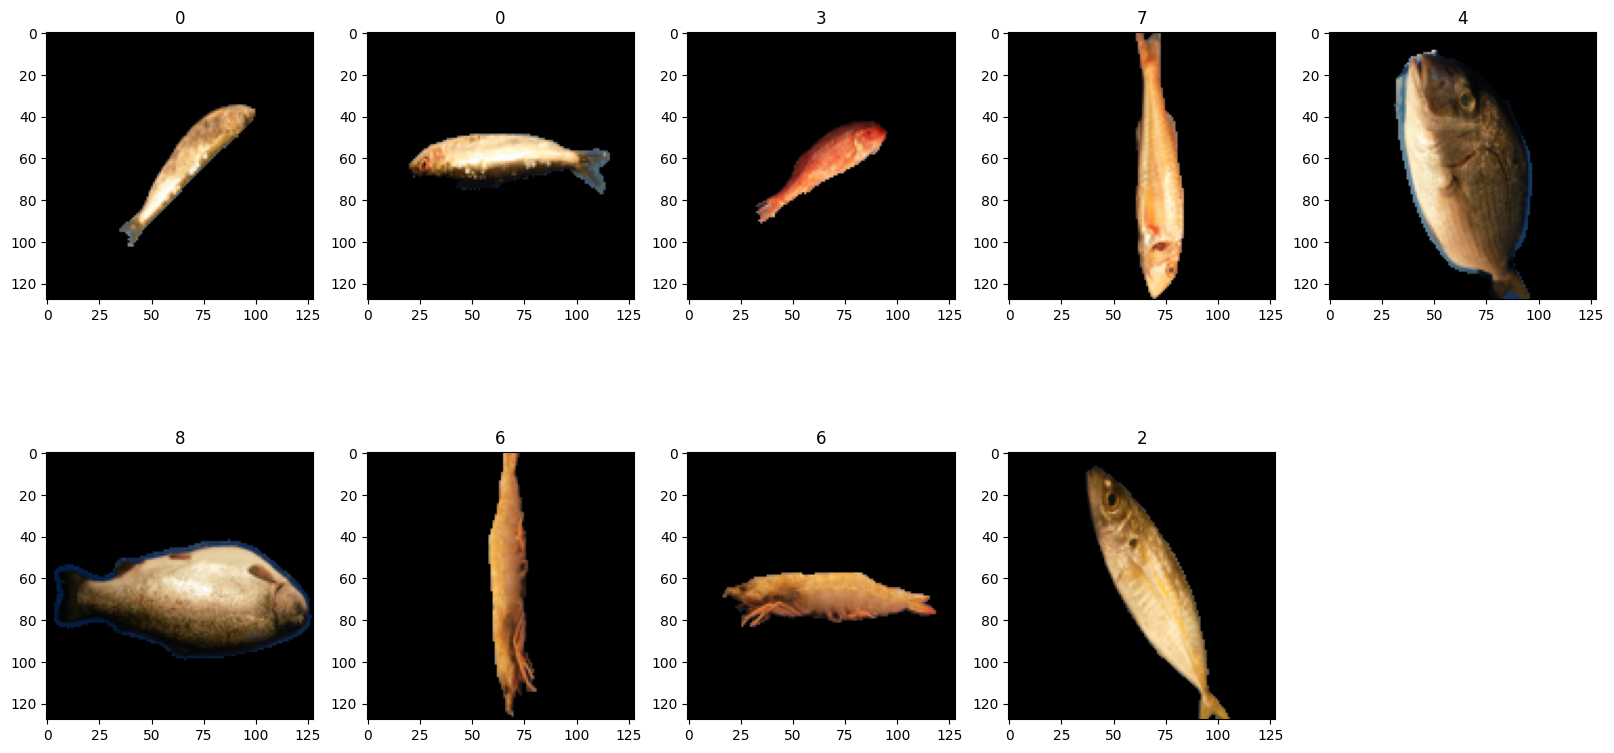

In [310]:
# in ra các ảnh là tâm của các cluster
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[center_id[i]].reshape(128, 128, 3))
    # plt.title(i)
    plt.title(labels[center_id[i]])

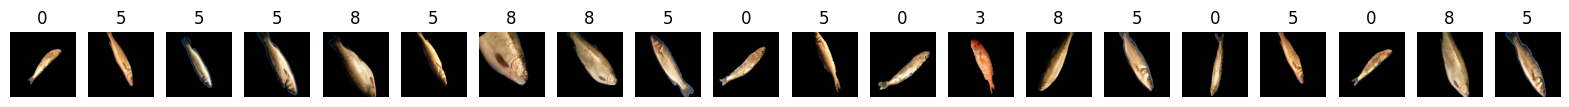

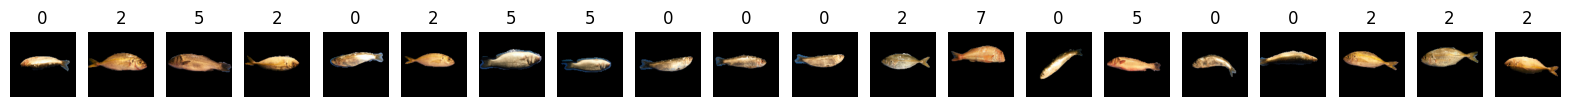

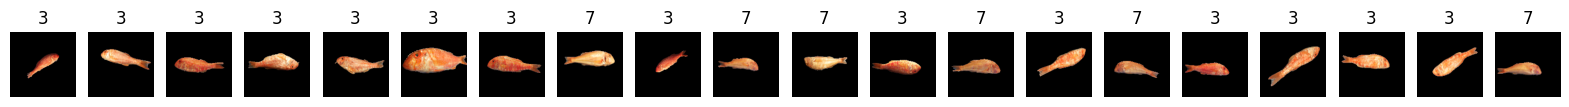

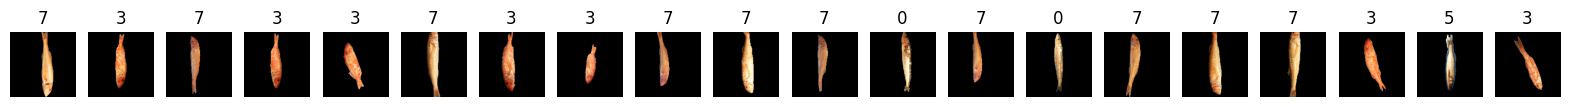

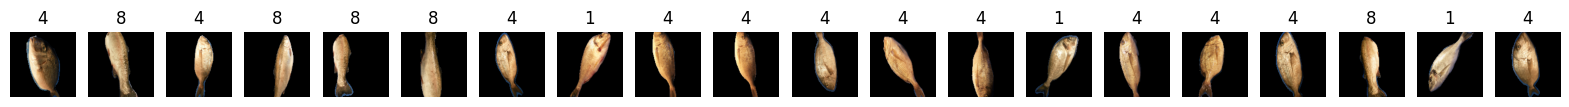

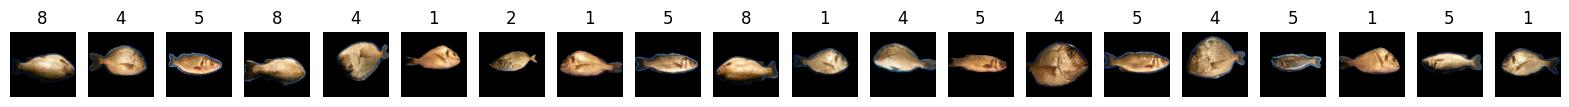

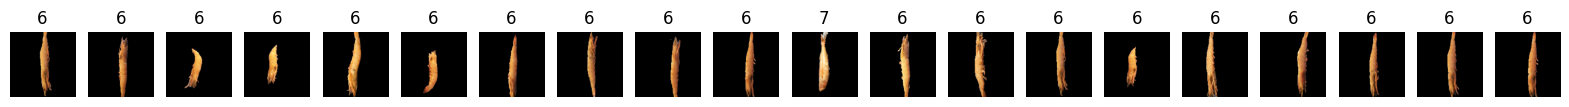

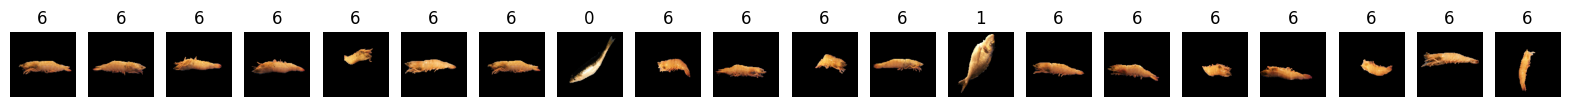

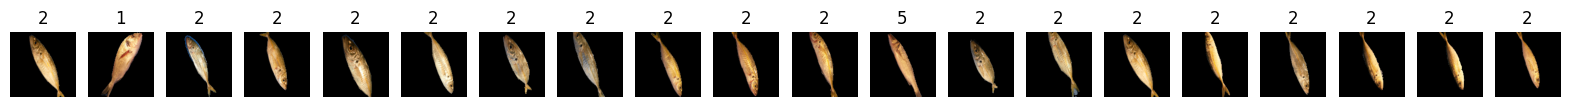

In [311]:
import matplotlib.pyplot as plt

# Reshape cluster centers to match image dimensions
cluster_centers = np.array(kmeans.cluster_centers_)

num_clusters = cluster_centers.shape[0]
images_per_row = 20

# Display clusters
for cluster_id in range(num_clusters):
    cluster_center = cluster_centers[cluster_id]

    # Create a new row for each cluster
    plt.figure(figsize=(20, 1))

    # Plot the cluster center as the first image in the row
    plt.subplot(1, images_per_row + 1, 1)
    plt.imshow(images[cluster_id].reshape(128,128,3))
    plt.title(labels[cluster_id])
    plt.axis('off')

    # Get indices of images in the current cluster
    cluster_indices = np.where(clusters == cluster_id)[0]

    # Plot the images in the cluster
    for i, img_idx in enumerate(cluster_indices[:images_per_row]):
        img = images[img_idx]
        plt.subplot(1, images_per_row, i+1)
        plt.imshow(img.reshape(128,128,3))
        plt.title(labels[img_idx])
        plt.axis('off')

    plt.show()

In [2]:
import cv2
import numpy as np

def rotate_object(image):
    # Phát hiện cạnh trong ảnh
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    
    # Tìm các đường thẳng trong ảnh bằng phép biến đổi Hough
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)
    
    if lines is None:
        return None
    
    # Tính góc trung bình của các đường thẳng
    angle_sum = 0
    num_lines = 0
    for line in lines:
        for x1, y1, x2, y2 in line:
            angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
            angle_sum += angle
            num_lines += 1
    
    if num_lines == 0:
        return None
    
    # Tính góc trung bình
    average_angle = angle_sum / num_lines
    
    # Quay ảnh
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), -average_angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    
    return rotated_image


# Đọc ảnh
image = cv2.imread("D:\\study\\machine_learning\\classification_fish\\clustering\\data\\Fish_Dataset_Segment\\Trout\\00001.png")

# Quay vật thể trong ảnh
rotated_image = rotate_object(image)

# Kiểm tra kích thước ảnh đã quay
if rotated_image is not None and rotated_image.shape[0] > 0 and rotated_image.shape[1] > 0:
    # Hiển thị ảnh gốc và ảnh đã quay
    cv2.imshow('Original Image', image)
    cv2.imshow('Rotated Image', rotated_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Không thể quay ảnh.")


Không thể quay ảnh.


In [40]:
def rotate_object(image_path):
    # Đọc ảnh
    image = cv2.imread(image_path)
    if image is None:
        print("Không có ảnh")
        return None

    # Phát hiện cạnh trong ảnh
    edges = cv2.Canny(image, 50, 150, apertureSize=3)

    # Tìm các đường thẳng trong ảnh bằng phép biến đổi Hough
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=10, minLineLength=100, maxLineGap=10)

    if lines is None:
        print("Không có đường thẳng")
        return None

    # Tính góc trung bình của các đường thẳng
    angle_sum = 0
    num_lines = 0
    for line in lines:
        for x1, y1, x2, y2 in line:
            angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
            angle_sum += angle
            num_lines += 1

    if num_lines == 0:
        return None

    # Tính góc trung bình
    average_angle = angle_sum / num_lines

    # Quay ảnh
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), -average_angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))

    return rotated_image


In [53]:
image_path = "D:\study\machine_learning\classification_fish\clustering\data\Fish_Dataset_Segment\Trout\\00016.png"

In [54]:
rotated_image = rotate_object(image_path)

if rotated_image is None:
    print("Không thể quay ảnh.")
else:
    # Hiển thị ảnh gốc và ảnh đã quay
    cv2.imshow('Original Image', cv2.imread(image_path))
    cv2.imshow('Rotated Image', rotated_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [55]:
--

SyntaxError: invalid syntax (3659366440.py, line 1)

---

### VGG19

In [ ]:
from tensorflow.keras.applications import VGG19

model = VGG19(weights='imagenet', include_top=False, pooling='avg')

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
# Lấy đặc trưng từ pre-trained model
features = model.predict(images)

29/29 [==============================] - 52s 2s/step


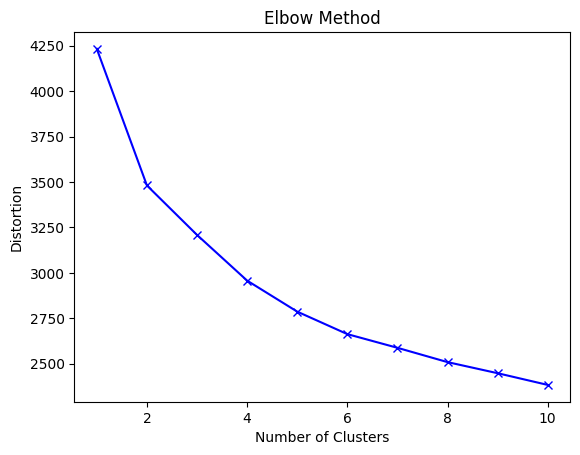

In [ ]:
warnings.filterwarnings("ignore")

# Khởi tạo một mảng lưu distortion cho mỗi số lượng cụm
distortions = []

# Thử các số lượng cụm từ 1 đến k_max
k_max = 10
for k in range(1, k_max+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    distortions.append(kmeans.inertia_)

# Vẽ đồ thị elbow
plt.plot(range(1, k_max+1), distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

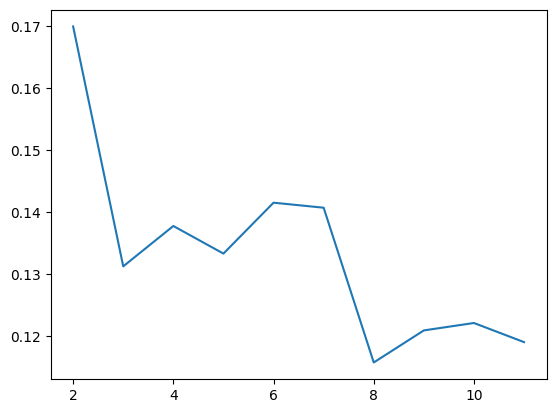

In [ ]:
warnings.filterwarnings("ignore")

scores = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    scores.append(silhouette_score(features, kmeans.labels_))

plt.plot(range(2, 12), scores)

In [ ]:
# Áp dụng K-means để phân cụm
kmeans = KMeans(n_clusters=9)
clusters = kmeans.fit_predict(features)

In [ ]:
# xác định vị trí các ảnh là tâm của các cluster
center_id = []
for i in range(9):
    center_id.append(np.where(clusters == i)[0][0])
center_id

[1, 16, 17, 12, 13, 0, 51, 22, 2]

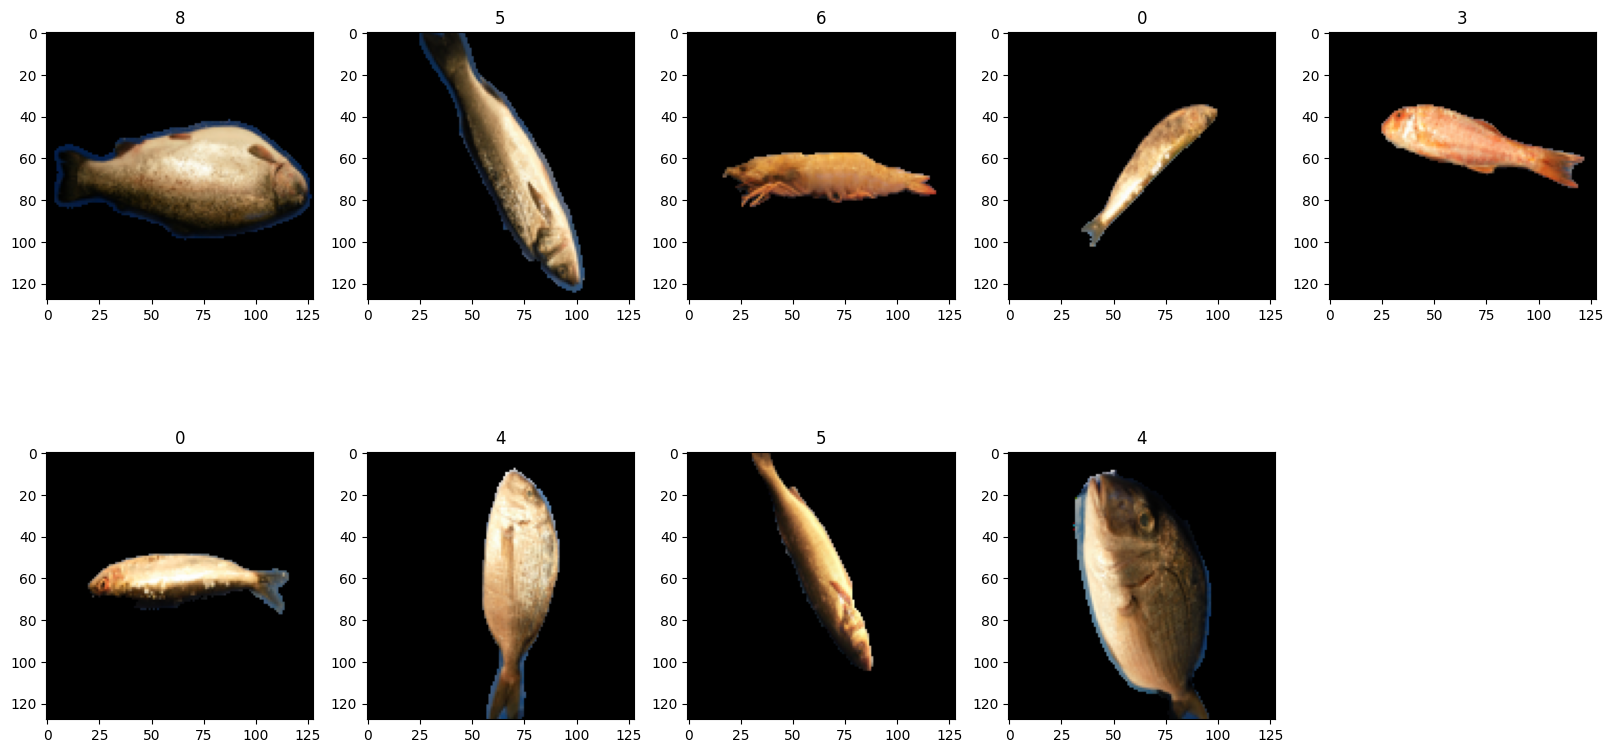

In [ ]:
# in ra các ảnh là tâm của các cluster
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[center_id[i]].reshape(128, 128, 3))
    # plt.title(i)
    plt.title(labels[center_id[i]])

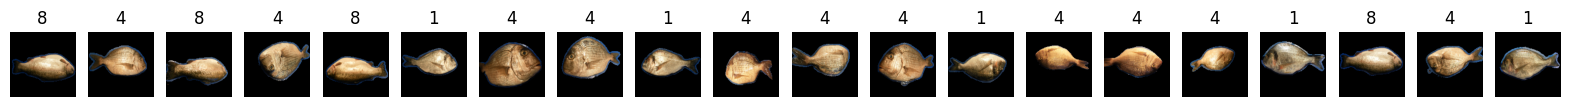

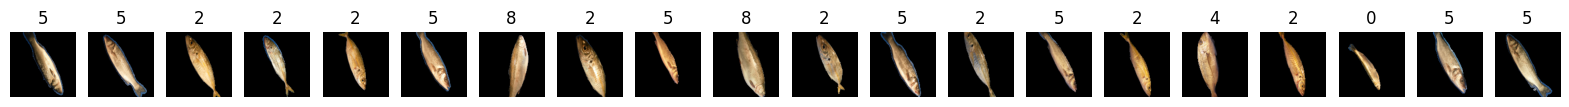

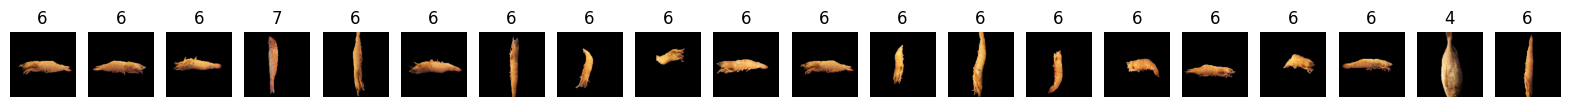

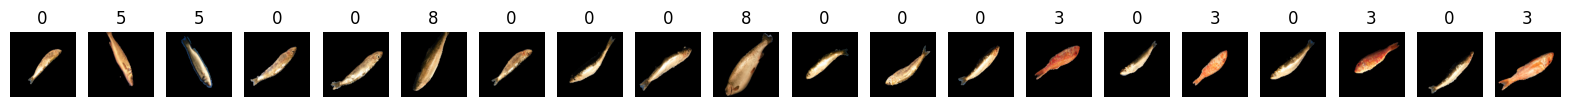

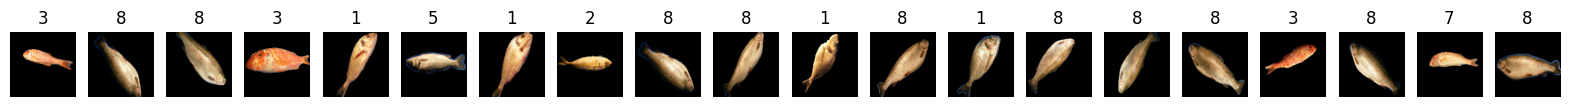

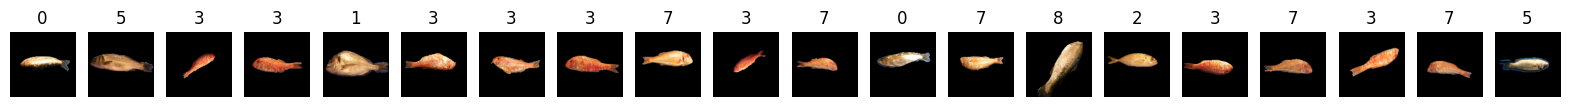

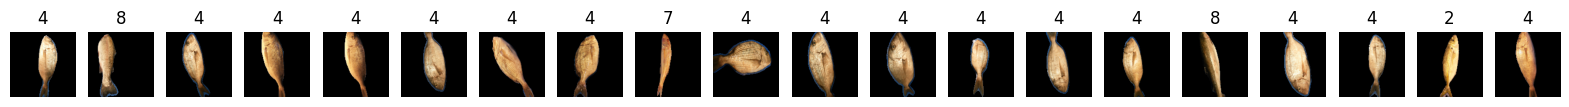

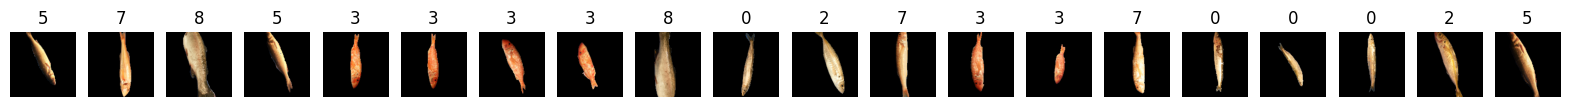

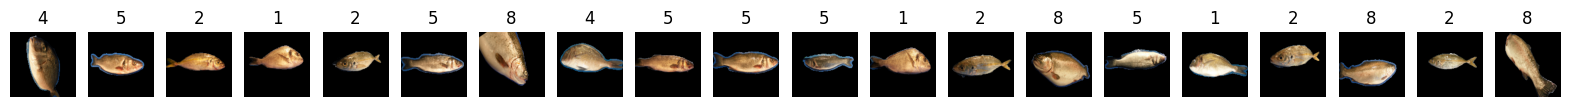

In [ ]:
import matplotlib.pyplot as plt

# Reshape cluster centers to match image dimensions
cluster_centers = np.array(kmeans.cluster_centers_)

num_clusters = cluster_centers.shape[0]
images_per_row = 20

# Display clusters
for cluster_id in range(num_clusters):
    cluster_center = cluster_centers[cluster_id]

    # Create a new row for each cluster
    plt.figure(figsize=(20, 1))

    # Plot the cluster center as the first image in the row
    plt.subplot(1, images_per_row + 1, 1)
    plt.imshow(images[cluster_id].reshape(128,128,3))
    plt.title(labels[cluster_id])
    plt.axis('off')

    # Get indices of images in the current cluster
    cluster_indices = np.where(clusters == cluster_id)[0]

    # Plot the images in the cluster
    for i, img_idx in enumerate(cluster_indices[:images_per_row]):
        img = images[img_idx]
        plt.subplot(1, images_per_row, i+1)
        plt.imshow(img.reshape(128,128,3))
        plt.title(labels[img_idx])
        plt.axis('off')

    plt.show()

---

### Xception

In [ ]:
from tensorflow.keras.applications import Xception

model = Xception(weights='imagenet', include_top=False, pooling='avg')

In [ ]:
# Lấy đặc trưng từ pre-trained model
features = model.predict(images)

29/29 [==============================] - 15s 497ms/step


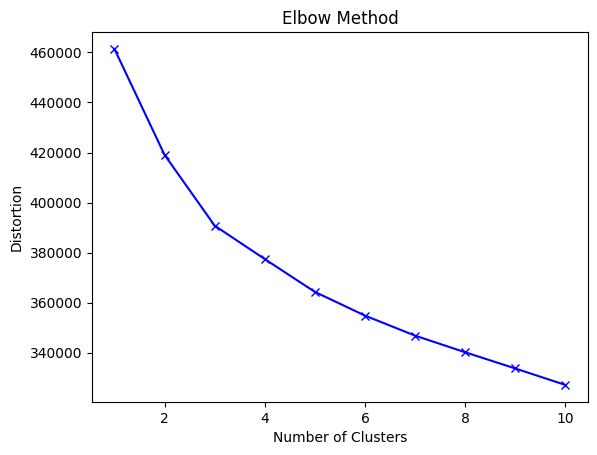

In [ ]:
warnings.filterwarnings("ignore")

# Khởi tạo một mảng lưu distortion cho mỗi số lượng cụm
distortions = []

# Thử các số lượng cụm từ 1 đến k_max
k_max = 10
for k in range(1, k_max+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    distortions.append(kmeans.inertia_)

# Vẽ đồ thị elbow
plt.plot(range(1, k_max+1), distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

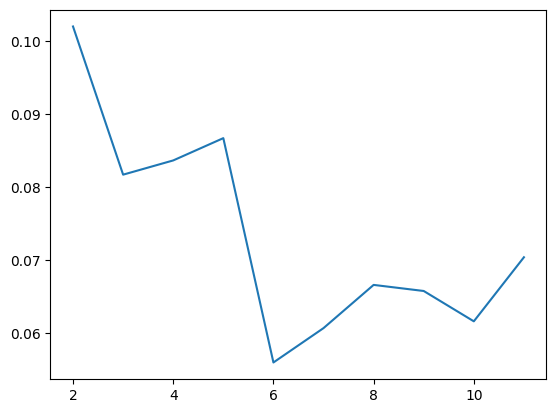

In [ ]:
warnings.filterwarnings("ignore")

scores = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    scores.append(silhouette_score(features, kmeans.labels_))

plt.plot(range(2, 12), scores)

In [ ]:
# Áp dụng K-means để phân cụm
kmeans = KMeans(n_clusters=9)
clusters = kmeans.fit_predict(features)

In [ ]:
# xác định vị trí các ảnh là tâm của các cluster
center_id = []
for i in range(9):
    center_id.append(np.where(clusters == i)[0][0])
center_id

[8, 16, 20, 2, 0, 51, 22, 1, 14]

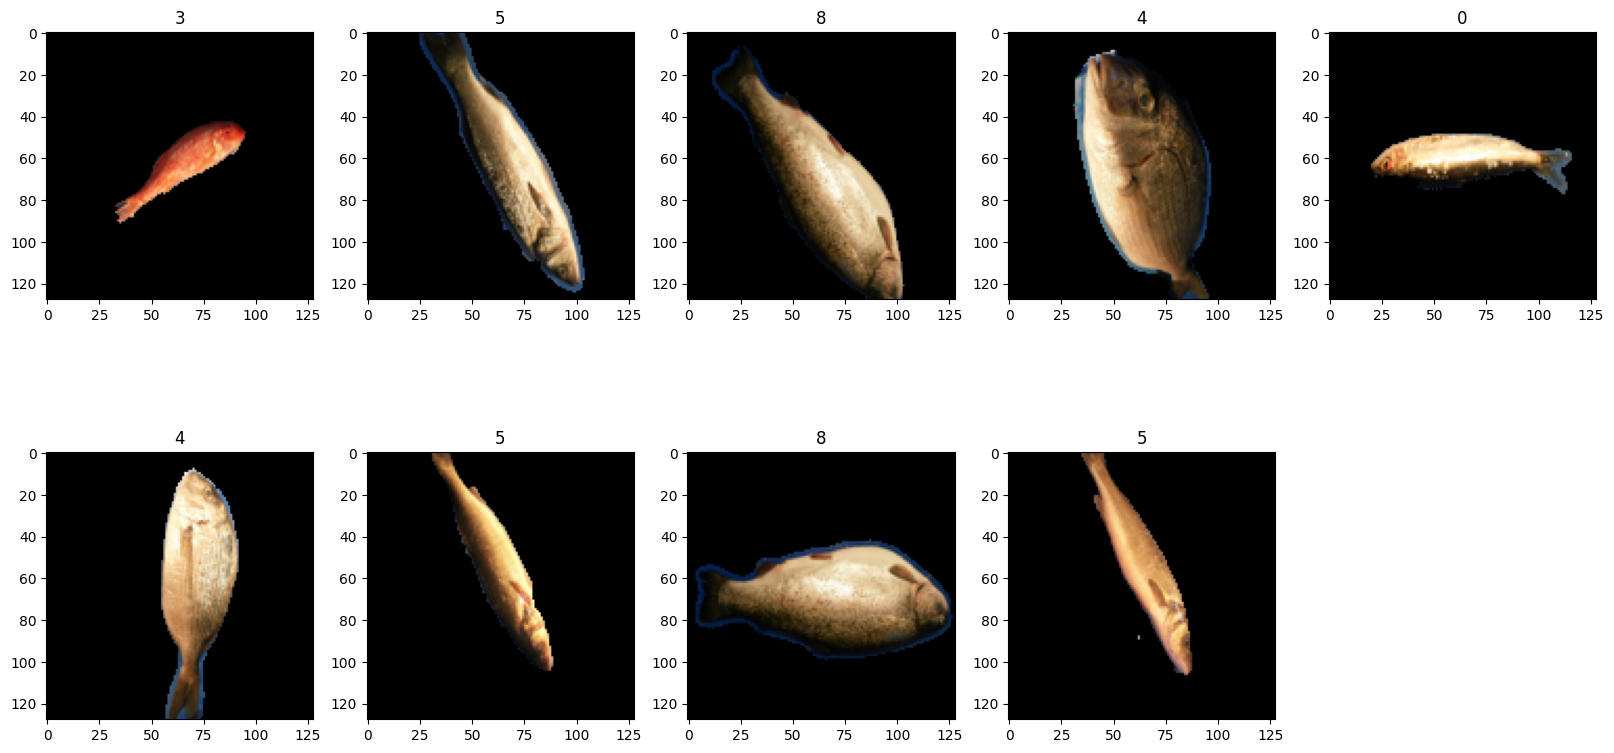

In [ ]:
# in ra các ảnh là tâm của các cluster
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[center_id[i]].reshape(128, 128, 3))
    # plt.title(i)
    plt.title(labels[center_id[i]])

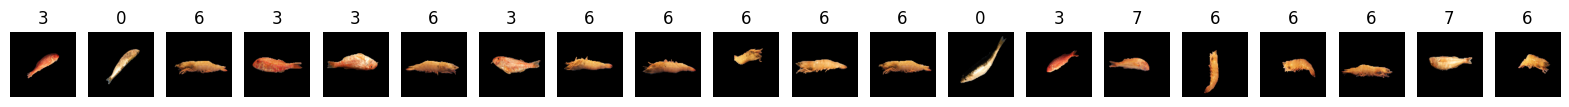

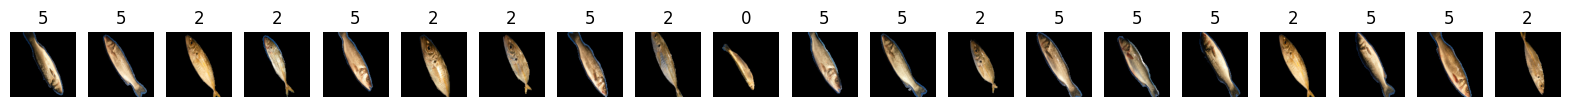

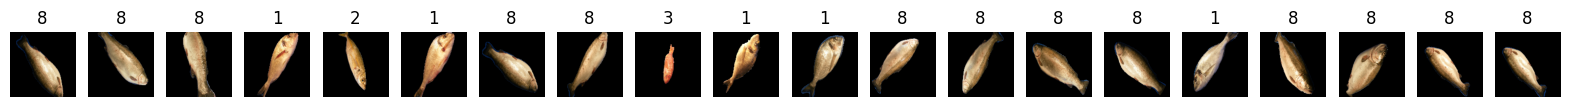

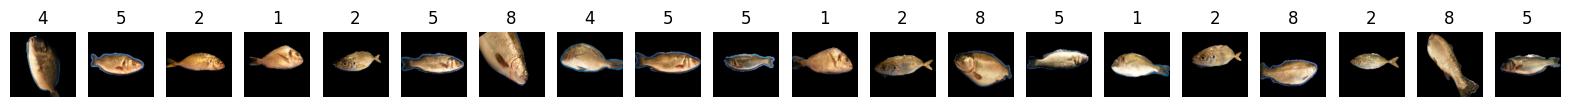

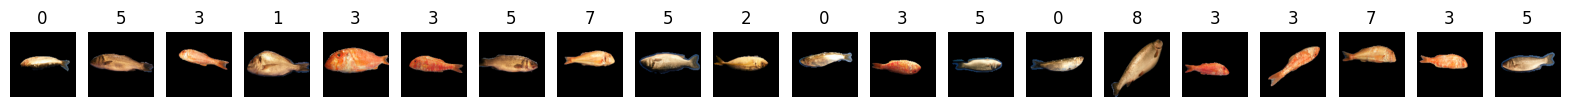

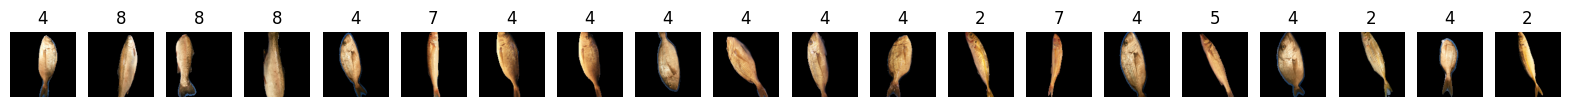

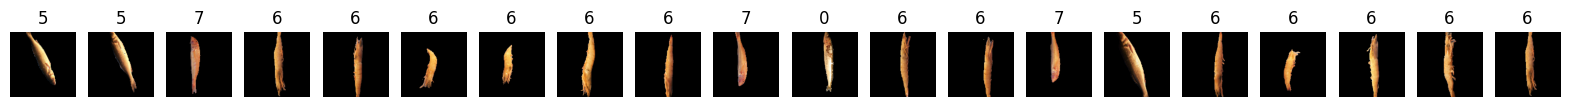

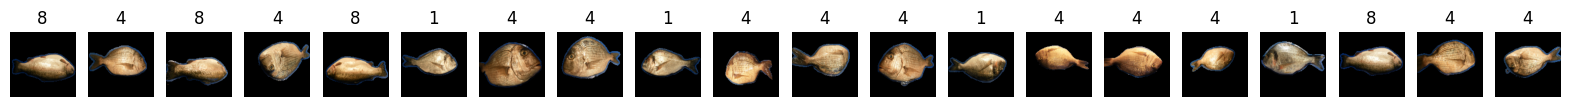

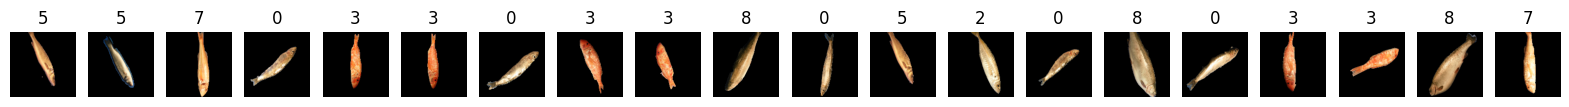

In [ ]:
import matplotlib.pyplot as plt

# Reshape cluster centers to match image dimensions
cluster_centers = np.array(kmeans.cluster_centers_)

num_clusters = cluster_centers.shape[0]
images_per_row = 20

# Display clusters
for cluster_id in range(num_clusters):
    cluster_center = cluster_centers[cluster_id]

    # Create a new row for each cluster
    plt.figure(figsize=(20, 1))

    # Plot the cluster center as the first image in the row
    plt.subplot(1, images_per_row + 1, 1)
    plt.imshow(images[cluster_id].reshape(128,128,3))
    plt.title(labels[cluster_id])
    plt.axis('off')

    # Get indices of images in the current cluster
    cluster_indices = np.where(clusters == cluster_id)[0]

    # Plot the images in the cluster
    for i, img_idx in enumerate(cluster_indices[:images_per_row]):
        img = images[img_idx]
        plt.subplot(1, images_per_row, i+1)
        plt.imshow(img.reshape(128,128,3))
        plt.title(labels[img_idx])
        plt.axis('off')

    plt.show()